<a href="https://colab.research.google.com/github/galileo15640215/kikagaku/blob/master/kikagaku14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキスト分類 (TensorFlow)
https://www.kikagaku.ai/tutorial/basic_of_nlp/learn/tensorflow_text_classification

In [3]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [0]:
import MeCab
mecab = MeCab.Tagger('-Ochasen')

In [0]:
res = mecab.parse('こんにちは、私はキカガクです。')

In [6]:
print(res)

こんにちは	コンニチハ	こんにちは	感動詞		
、	、	、	記号-読点		
私	ワタシ	私	名詞-代名詞-一般		
は	ハ	は	助詞-係助詞		
キカガク	キカガク	キカガク	名詞-一般		
です	デス	です	助動詞	特殊・デス	基本形
。	。	。	記号-句点		
EOS



In [7]:
res

'こんにちは\tコンニチハ\tこんにちは\t感動詞\t\t\n、\t、\t、\t記号-読点\t\t\n私\tワタシ\t私\t名詞-代名詞-一般\t\t\nは\tハ\tは\t助詞-係助詞\t\t\nキカガク\tキカガク\tキカガク\t名詞-一般\t\t\nです\tデス\tです\t助動詞\t特殊・デス\t基本形\n。\t。\t。\t記号-句点\t\t\nEOS\n'

In [0]:
text1 = 'キカガクでは、ディープラーニングを含んだ機械学習や人工知能の教育を行っています。'
text2 = '代表の吉崎は大学院では機械学習・ロボットのシステム制御、画像処理の研究に携わっていました。'
text3 = '機械学習、システム制御、画像処理ではすべて線形代数とプログラミングが不可欠になります。'

In [9]:
# 形態素解析
res = mecab.parse(text1)
print(res)

キカガク	キカガク	キカガク	名詞-一般		
で	デ	で	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
、	、	、	記号-読点		
ディープラーニング	ディープラーニング	ディープラーニング	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
含ん	フクン	含む	動詞-自立	五段・マ行	連用タ接続
だ	ダ	だ	助動詞	特殊・タ	基本形
機械	キカイ	機械	名詞-一般		
学習	ガクシュウ	学習	名詞-サ変接続		
や	ヤ	や	助詞-並立助詞		
人工	ジンコウ	人工	名詞-一般		
知能	チノウ	知能	名詞-一般		
の	ノ	の	助詞-連体化		
教育	キョウイク	教育	名詞-サ変接続		
を	ヲ	を	助詞-格助詞-一般		
行っ	オコナッ	行う	動詞-自立	五段・ワ行促音便	連用タ接続
て	テ	て	助詞-接続助詞		
い	イ	いる	動詞-非自立	一段	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
EOS



In [10]:
res

'キカガク\tキカガク\tキカガク\t名詞-一般\t\t\nで\tデ\tで\t助詞-格助詞-一般\t\t\nは\tハ\tは\t助詞-係助詞\t\t\n、\t、\t、\t記号-読点\t\t\nディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t\nを\tヲ\tを\t助詞-格助詞-一般\t\t\n含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続\nだ\tダ\tだ\t助動詞\t特殊・タ\t基本形\n機械\tキカイ\t機械\t名詞-一般\t\t\n学習\tガクシュウ\t学習\t名詞-サ変接続\t\t\nや\tヤ\tや\t助詞-並立助詞\t\t\n人工\tジンコウ\t人工\t名詞-一般\t\t\n知能\tチノウ\t知能\t名詞-一般\t\t\nの\tノ\tの\t助詞-連体化\t\t\n教育\tキョウイク\t教育\t名詞-サ変接続\t\t\nを\tヲ\tを\t助詞-格助詞-一般\t\t\n行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続\nて\tテ\tて\t助詞-接続助詞\t\t\nい\tイ\tいる\t動詞-非自立\t一段\t連用形\nます\tマス\tます\t助動詞\t特殊・マス\t基本形\n。\t。\t。\t記号-句点\t\t\nEOS\n'

In [11]:
# 改行ごとに分割し、リストに格納
res.split('\n') 

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械\tキカイ\t機械\t名詞-一般\t\t',
 '学習\tガクシュウ\t学習\t名詞-サ変接続\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工\tジンコウ\t人工\t名詞-一般\t\t',
 '知能\tチノウ\t知能\t名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t',
 'EOS',
 '']

In [12]:
# 最後の 2 つの要素までをスライス
res.split('\n')[:-2]

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tディープラーニング\t名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械\tキカイ\t機械\t名詞-一般\t\t',
 '学習\tガクシュウ\t学習\t名詞-サ変接続\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工\tジンコウ\t人工\t名詞-一般\t\t',
 '知能\tチノウ\t知能\t名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t']

In [13]:
# 1 つ目の単語をスライス
res.split('\n')[0]

'キカガク\tキカガク\tキカガク\t名詞-一般\t\t'

In [14]:
# 品詞の取得
res .split('\n')[0].split('\t')[3]

'名詞-一般'

In [0]:
nouns = [] # 品詞が名詞 (noun) である単語を格納するリスト
res = mecab.parse(text1)
words = res.split('\n')[:-2]
for word in words:
    part = word.split('\t')
    if '名詞' in part[3]:
        nouns.append(part[0])

In [16]:
nouns

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

In [0]:
def get_nouns(text):
    nouns = []
    res = mecab.parse(text)
    words = res.split('\n')[:-2]
    for word in words:
        part = word.split('\t')
        if '名詞' in part[3]:
            nouns.append(part[0])
    return nouns

In [18]:
nouns1 = get_nouns(text1)
nouns1

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

In [19]:
nouns2 = get_nouns(text2)
nouns2

['代表', '吉崎', '大学院', '機械', '学習', 'ロボット', 'システム', '制御', '画像', '処理', '研究']

In [20]:
nouns3 = get_nouns(text3)
nouns3

['機械', '学習', 'システム', '制御', '画像', '処理', 'すべて', '線形', '代数', 'プログラミング', '不可欠']

In [21]:
nouns1

['キカガク', 'ディープラーニング', '機械', '学習', '人工', '知能', '教育']

In [22]:
# 要素を半角スペースで結合
' '.join(nouns1)

'キカガク ディープラーニング 機械 学習 人工 知能 教育'

In [0]:
nouns_list = [nouns1, nouns2, nouns3]
corpus = []
for nouns in nouns_list:
  corpus.append(' '.join(nouns))

In [24]:
corpus

['キカガク ディープラーニング 機械 学習 人工 知能 教育',
 '代表 吉崎 大学院 機械 学習 ロボット システム 制御 画像 処理 研究',
 '機械 学習 システム 制御 画像 処理 すべて 線形 代数 プログラミング 不可欠']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)

In [26]:
vectorizer.vocabulary_

{'すべて': 0,
 'キカガク': 1,
 'システム': 2,
 'ディープラーニング': 3,
 'プログラミング': 4,
 'ロボット': 5,
 '不可欠': 6,
 '人工': 7,
 '代数': 8,
 '代表': 9,
 '処理': 10,
 '制御': 11,
 '吉崎': 12,
 '大学院': 13,
 '学習': 14,
 '教育': 15,
 '機械': 16,
 '画像': 17,
 '知能': 18,
 '研究': 19,
 '線形': 20}

In [27]:
x = x.toarray()
print(x)

[[0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0]
 [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1]]


In [28]:
from google.colab import files
uploaded = files.upload()

Saving texts.zip to texts.zip


In [47]:
# 解凍コマンド
!unzip -d text texts.zip

Streaming output truncated to the last 5000 lines.
  inflating: text/it-life-hack/it-life-hack-6631260.txt  
  inflating: text/it-life-hack/it-life-hack-6623116.txt  
  inflating: text/it-life-hack/it-life-hack-6732769.txt  
  inflating: text/it-life-hack/it-life-hack-6494894.txt  
  inflating: text/it-life-hack/it-life-hack-6472336.txt  
  inflating: text/it-life-hack/it-life-hack-6915718.txt  
  inflating: text/it-life-hack/it-life-hack-6443074.txt  
  inflating: text/it-life-hack/it-life-hack-6334919.txt  
  inflating: text/it-life-hack/it-life-hack-6720225.txt  
  inflating: text/it-life-hack/it-life-hack-6702709.txt  
  inflating: text/it-life-hack/it-life-hack-6745318.txt  
  inflating: text/it-life-hack/it-life-hack-6435653.txt  
  inflating: text/it-life-hack/it-life-hack-6766700.txt  
  inflating: text/it-life-hack/it-life-hack-6497966.txt  
  inflating: text/it-life-hack/it-life-hack-6530273.txt  
  inflating: text/it-life-hack/it-life-hack-6782479.txt  
  inflating: text/it-

In [48]:
     # 解凍したファイルの確認
!ls text/

it-life-hack   livedoor-homme  peachy  sports-watch
kaden-channel  movie-enter     smax    topic-news


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from glob import glob

In [51]:
# text ディレクトリ以下のディレクトリの取得
directories = glob('text/*')
directories

['text/peachy',
 'text/movie-enter',
 'text/sports-watch',
 'text/livedoor-homme',
 'text/it-life-hack',
 'text/smax',
 'text/topic-news',
 'text/kaden-channel']

In [52]:
filepaths = glob('{}/*.txt'.format(directories[0]))
filepaths[:3]

['text/peachy/peachy-6684788.txt',
 'text/peachy/peachy-4495213.txt',
 'text/peachy/peachy-4664370.txt']

In [53]:
with open(filepaths[0], encoding='utf-8') as f:
  text = ''.join(f.readlines()[2:])
print(text)

夏ならではの開放的な恋愛エピソード／マザコン男の見分け方など−【恋愛】週間ランキング
Peachyでも大人気の「恋愛」をテーマにした記事の週間ランキングです！2012年6月14日〜6月20日の間にPeachyのアプリでみんなが読んだ恋愛記事TOP5をお届けします。

第1位：暑くなると刺激が欲しくなる!?エロい恋愛エピソード4選

最近、夏日を上回る気温が続き、すっかり暑くなってきましたね。夏が来ると、なぜか筆者の周りでは、少しエロい恋愛話をするための女子会が開催されます。そこで、夏ならではの開放的な恋愛エピソードを仕入れてきました。

第2位：あなたの女磨きは間違っている!? 男がドン引きする趣味3つ【後編】

【前編】に引き続き、【後編】では男性をドン引きさせる可能性がある趣味、残りふたつをご紹介します。

第3位：お疲れ女子に効く疲労回復法4選

残業続きで、仕事から帰るとお風呂すらめんどくさくてベッドに直行！　「もう、何もしたくない…」といったお疲れ女子はいませんか？　「Natural美人ガイド」の監修者・蓮村誠さんが、そんな慢性的な疲れの解消方法を教えてくれました。

第4位：男性が幻滅してしまう食事中の振る舞い9パターン

合コンやデートなどで、男性と一緒に食事をする機会は多いもの。そのときに、何気ない食事のマナーや振る舞いで、男性を幻滅させたらもったいないです。そうならないために、今回はスゴレン男性読者に聞いた「男性が幻滅してしまう食事中の振る舞い」をご紹介します。

第5位：○○○柄を好む男子はマザコン!?

付き合いたてのときは全然気にならなかったのに、長く付き合ううちに目についてくることってありますよね。「彼の話って、なんかいつも否定的だな」「いつもおごってくれるけど、もしかしてムリしてる!?」などなど…。そこで、「風水芸人◆出雲阿国」サイトの「風水的ダメ男チェック」の中から、彼の本性を見抜くポイントをご紹介します。

以上、先週のPeachy【恋愛】カテゴリの人気記事ランキングでした！



In [54]:
for (i, directory) in enumerate(directories):
    print(i, directory)
    print('- - -')

0 text/peachy
- - -
1 text/movie-enter
- - -
2 text/sports-watch
- - -
3 text/livedoor-homme
- - -
4 text/it-life-hack
- - -
5 text/smax
- - -
6 text/topic-news
- - -
7 text/kaden-channel
- - -


In [0]:
texts, labels = [], []
for (i, directory) in enumerate(directories):
    #各ディレクトリ内のtxtファイルのパスをすべて取得
    filepaths = glob('{}/*.txt'.format(directory))
    # テキストを読み込んで、内容をtextに格納、ラベルも併せて格納
    for filepath in filepaths:
        with open(filepath, encoding='utf-8') as f:
            text = ''.join(f.readlines()[2:])  # URL等の先頭２行を除いた各行の文章を連結（join）して格納
            texts.append(text)
            labels.append(i)

In [56]:
len(texts), len(labels)

(6505, 6505)

In [57]:
texts[0]

'夏ならではの開放的な恋愛エピソード／マザコン男の見分け方など−【恋愛】週間ランキング\nPeachyでも大人気の「恋愛」をテーマにした記事の週間ランキングです！2012年6月14日〜6月20日の間にPeachyのアプリでみんなが読んだ恋愛記事TOP5をお届けします。\n\n第1位：暑くなると刺激が欲しくなる!?エロい恋愛エピソード4選\n\n最近、夏日を上回る気温が続き、すっかり暑くなってきましたね。夏が来ると、なぜか筆者の周りでは、少しエロい恋愛話をするための女子会が開催されます。そこで、夏ならではの開放的な恋愛エピソードを仕入れてきました。\n\n第2位：あなたの女磨きは間違っている!? 男がドン引きする趣味3つ【後編】\n\n【前編】に引き続き、【後編】では男性をドン引きさせる可能性がある趣味、残りふたつをご紹介します。\n\n第3位：お疲れ女子に効く疲労回復法4選\n\n残業続きで、仕事から帰るとお風呂すらめんどくさくてベッドに直行！\u3000「もう、何もしたくない…」といったお疲れ女子はいませんか？\u3000「Natural美人ガイド」の監修者・蓮村誠さんが、そんな慢性的な疲れの解消方法を教えてくれました。\n\n第4位：男性が幻滅してしまう食事中の振る舞い9パターン\n\n合コンやデートなどで、男性と一緒に食事をする機会は多いもの。そのときに、何気ない食事のマナーや振る舞いで、男性を幻滅させたらもったいないです。そうならないために、今回はスゴレン男性読者に聞いた「男性が幻滅してしまう食事中の振る舞い」をご紹介します。\n\n第5位：○○○柄を好む男子はマザコン!?\n\n付き合いたてのときは全然気にならなかったのに、長く付き合ううちに目についてくることってありますよね。「彼の話って、なんかいつも否定的だな」「いつもおごってくれるけど、もしかしてムリしてる!?」などなど…。そこで、「風水芸人◆出雲阿国」サイトの「風水的ダメ男チェック」の中から、彼の本性を見抜くポイントをご紹介します。\n\n以上、先週のPeachy【恋愛】カテゴリの人気記事ランキングでした！\n'

In [58]:
labels[0]

0

In [0]:
import MeCab
mecab = MeCab.Tagger('-Ochasen')

In [0]:
def get_nouns(text):
    nouns = []
    res = mecab.parse(text)
    words = res.split('\n')[:-2]
    for word in words:
        part = word.split('\t')
        if '名詞' in part[3]:
            nouns.append(part[0])
    return nouns

In [0]:
word_collect = []
for text in texts:
    nouns = get_nouns(text)
    word_collect.append(' '.join(nouns))

In [62]:
word_collect[0]

'夏 ならでは 開放 的 恋愛 エピソード マザコン 男 方 恋愛 週間 ランキング Peachy 大人気 恋愛 テーマ 記事 週間 ランキング 2012 年 6 月 14 日 6 月 20 日 間 Peachy アプリ みんな 恋愛 記事 TOP 5 お 届け 1 位 刺激 !? エロ 恋愛 エピソード 4 選 最近 夏 日 気温 夏 筆者 周り エロ 恋愛 話 ため 女子 会 開催 夏 ならでは 開放 的 恋愛 エピソード 2 位 あなた 女 磨き !? 男 引き 趣味 3 後編 前編 後編 男性 可能 性 趣味 残り ふたつ ご 紹介 3 位 お 疲れ 女子 疲労 回復 法 4 選 残業 続き 仕事 お 風呂 ベッド 直行 何 お 疲れ 女子 Natural 美人 ガイド 監修 者 蓮村 誠 さん 慢性 的 疲れ 解消 方法 4 位 男性 幻滅 食事 中 振る舞い 9 パターン 合コン デート 男性 一緒 食事 機会 もの とき 食事 マナー 振る舞い 男性 幻滅 ため 今回 スゴレン 男性 読者 男性 幻滅 食事 中 振る舞い ご 紹介 5 位 柄 男子 マザコン !? 付き合い たて とき 気 うち 目 こと 彼 話 否定 的 ムリ !?」 風水 芸人 出雲阿国 サイト 風水 的 ダメ 男 チェック 中 彼 本性 ポイント ご 紹介 以上 先週 Peachy 恋愛 カテゴリ 人気 記事 ランキング'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=20)
x = vectorizer.fit_transform(word_collect)
x = x.toarray()

In [64]:
len(vectorizer.vocabulary_)

5795

In [65]:
len(x)

6505

In [0]:
x = x.astype('float32')
t = np.array(labels, 'int32')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

In [0]:
import tensorflow as tf

In [0]:
import os
import random

def reset_seed(seed=0):
    
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [0]:
_, n_input = x_train.shape
n_output = len(np.unique(t_test))

In [0]:
from tensorflow.keras import models, layers

In [0]:
reset_seed(0)

model = models.Sequential([
    layers.Dense(200, input_shape=(n_input, ), activation='relu'),
    layers.Dense(n_output, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])

In [73]:
history = model.fit(x_train, t_train,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test, t_test))

Epoch 1/20
46/46 [==============================] - 0s 10ms/step - loss: 1.7504 - accuracy: 0.4162 - val_loss: 1.4690 - val_accuracy: 0.6311
Epoch 2/20
46/46 [==============================] - 0s 6ms/step - loss: 1.2390 - accuracy: 0.7610 - val_loss: 1.1292 - val_accuracy: 0.7910
Epoch 3/20
46/46 [==============================] - 0s 7ms/step - loss: 0.9442 - accuracy: 0.8493 - val_loss: 0.9078 - val_accuracy: 0.8412
Epoch 4/20
46/46 [==============================] - 0s 6ms/step - loss: 0.7538 - accuracy: 0.8796 - val_loss: 0.7643 - val_accuracy: 0.8653
Epoch 5/20
46/46 [==============================] - 0s 7ms/step - loss: 0.6273 - accuracy: 0.8994 - val_loss: 0.6653 - val_accuracy: 0.8776
Epoch 6/20
46/46 [==============================] - 0s 7ms/step - loss: 0.5389 - accuracy: 0.9095 - val_loss: 0.5958 - val_accuracy: 0.8847
Epoch 7/20
46/46 [==============================] - 0s 7ms/step - loss: 0.4731 - accuracy: 0.9196 - val_loss: 0.5435 - val_accuracy: 0.8899
Epoch 8/20
46/46 [=

In [74]:
# 学習結果を取得
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
17,0.206315,0.967274,0.330845,0.919057
18,0.195834,0.970130,0.323259,0.919570
19,0.186290,0.971887,0.315324,0.919570


Text(0.5, 0, 'epochs')

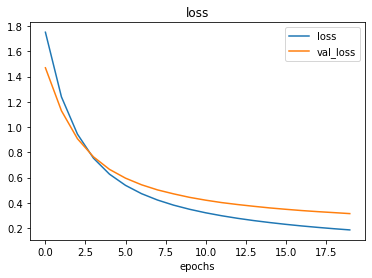

In [75]:
# 損失を可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

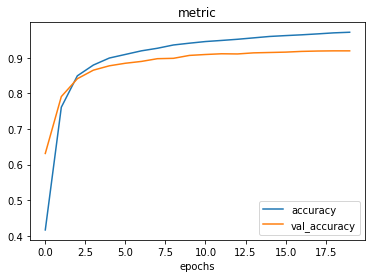

In [76]:
# 正解率を可視化
results[['accuracy', 'val_accuracy']].plot(title='metric')
plt.xlabel('epochs')